In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv(r'C:\Users\Shivam kumar\Desktop\PROJECT\OLD-CAR-PRICE-PREDICTION\Data\Used_Car_Price_Prediction.csv')
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [49]:
df.isnull().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type               103
transmission            556
variant                   0
assured_buy               0
registered_city          10
registered_state         10
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

In [50]:
df.columns

Index(['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city',
       'times_viewed', 'body_type', 'transmission', 'variant', 'assured_buy',
       'registered_city', 'registered_state', 'is_hot', 'rto', 'source',
       'make', 'model', 'car_availability', 'total_owners', 'broker_quote',
       'original_price', 'car_rating', 'ad_created_on', 'fitness_certificate',
       'emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail'],
      dtype='object')

In [51]:
df.duplicated().sum()

np.int64(1)

In [52]:
df.dtypes

car_name                object
yr_mfr                   int64
fuel_type               object
kms_run                  int64
sale_price               int64
city                    object
times_viewed             int64
body_type               object
transmission            object
variant                 object
assured_buy               bool
registered_city         object
registered_state        object
is_hot                    bool
rto                     object
source                  object
make                    object
model                   object
car_availability        object
total_owners             int64
broker_quote             int64
original_price         float64
car_rating              object
ad_created_on           object
fitness_certificate     object
emi_starts_from          int64
booking_down_pymnt       int64
reserved                  bool
warranty_avail            bool
dtype: object

In [53]:
df.shape

(7400, 29)

1. Solving the null value problem

In [54]:
# finding the percentage of missing data in every rows

for column in df.columns:
    totalNull = df[column].isnull().sum()
    nullPercentage = (totalNull*100) // 7400
    print(f"{nullPercentage} percentage of data is null in {column} is ")

0 percentage of data is null in car_name is 
0 percentage of data is null in yr_mfr is 
0 percentage of data is null in fuel_type is 
0 percentage of data is null in kms_run is 
0 percentage of data is null in sale_price is 
0 percentage of data is null in city is 
0 percentage of data is null in times_viewed is 
1 percentage of data is null in body_type is 
7 percentage of data is null in transmission is 
0 percentage of data is null in variant is 
0 percentage of data is null in assured_buy is 
0 percentage of data is null in registered_city is 
0 percentage of data is null in registered_state is 
0 percentage of data is null in is_hot is 
0 percentage of data is null in rto is 
1 percentage of data is null in source is 
0 percentage of data is null in make is 
0 percentage of data is null in model is 
8 percentage of data is null in car_availability is 
0 percentage of data is null in total_owners is 
0 percentage of data is null in broker_quote is 
44 percentage of data is null in 

Mejorly these data is null, some are also null but very so we can just drop them 

- 1 % of body_type data is null
- 7 % of transmission is null
- 1 % of source is null
- 8 % of car availability is null
- 44 % of original_price is null

body_type, car availability can effect the model as it can give the wrong information about the car so we will drop it

44% of original_price is null, -> i will fill the data with the median of the data for the same model from the data



In [55]:
# filling the original_price data with the median value of the same model

df['original_price'] = df['original_price'].fillna(
    df.groupby('car_name')['original_price'].transform('median')
)

In [56]:
df['original_price'].isnull().sum()

np.int64(78)

after doing the fill up in original_price still sum rows remain empty that can be of many reason either these row are of the group whose all data is null for original_price.

In [57]:
df.isnull().sum()

car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type              103
transmission           556
variant                  0
assured_buy              0
registered_city         10
registered_state        10
is_hot                   0
rto                      0
source                 126
make                     0
model                    0
car_availability       620
total_owners             0
broker_quote             0
original_price          78
car_rating               9
ad_created_on            1
fitness_certificate      8
emi_starts_from          0
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

In [58]:
# now we will drop the null rows

df = df.dropna(axis=0)

In [59]:
df.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
broker_quote           0
original_price         0
car_rating             0
ad_created_on          0
fitness_certificate    0
emi_starts_from        0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

In [60]:
df.duplicated().sum()

np.int64(1)

In [61]:
# removing duplicated value

df = df.drop_duplicates()

In [62]:
# Reseting the index

df = df.reset_index(drop=True) 

In [63]:
df.tail()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
6244,maruti alto k10,2010,petrol,40666,189699,new delhi,1327,hatchback,manual,vxi,...,1,174955,234300.0,great,2021-02-19T05:23:22.199,True,4406,28455,False,False
6245,volkswagen jetta,2012,petrol,88973,448699,new delhi,1171,sedan,manual,trendline 1.4 tsi mt,...,2,450466,564246.0,great,2021-03-20T09:07:40.447,True,10422,67305,False,False
6246,maruti ignis,2018,petrol,8854,562599,chennai,640,hatchback,manual,delta 1.2 k12,...,1,549440,567063.0,great,2021-03-31T10:21:56.289,True,13068,84390,False,False
6247,honda amaze,2015,petrol,46300,400499,pune,795,sedan,manual,1.2 smt i vtec,...,1,383419,441793.0,great,2021-03-04T12:40:38.652,True,9303,60075,True,False
6248,maruti alto k10,2016,petrol,27245,284099,new delhi,1155,hatchback,manual,lxi,...,1,286515,369885.0,great,2021-03-16T13:31:39.766,True,6599,42615,False,False


In [64]:
df.shape

(6249, 29)

In [65]:
# Checking the skewness of the resell price for the car

df['sale_price'].skew()

np.float64(2.773630776752965)

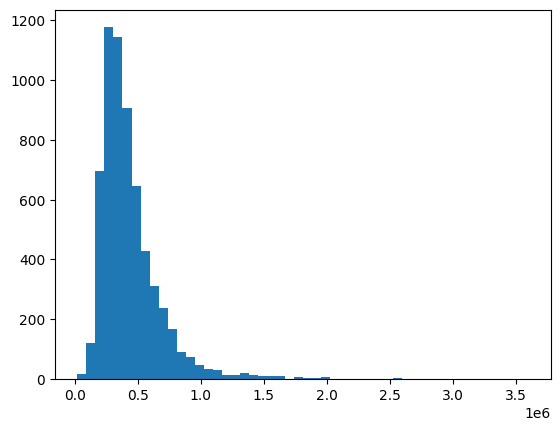

In [66]:
plt.hist(df['sale_price'],bins=50)
plt.show()

The target variable that is the sale price is highly skewed,
which can cause MSE error

- skewness > 1 means highly skewwed

In [67]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,6249.000000,6249.000000,6.249000e+03,6249.000000,6249.000000,6.249000e+03,6.249000e+03,6249.000000,6249.000000
mean,2013.751000,63528.035846,4.382267e+05,1597.447592,1.322772,4.216142e+05,4.894197e+05,10178.911986,65734.155705
std,2.857548,41252.982925,2.526564e+05,2045.393310,0.566902,2.588611e+05,2.631279e+05,5868.574371,37898.484752
min,2000.000000,60.000000,2.000000e+04,3.000000,1.000000,0.000000e+00,9.689900e+04,465.000000,3000.000000
25%,2012.000000,34181.000000,2.806990e+05,627.000000,1.000000,2.564000e+05,3.163200e+05,6520.000000,42105.000000
50%,2014.000000,56900.000000,3.761990e+05,1140.000000,1.000000,3.585210e+05,4.417930e+05,8738.000000,56430.000000
75%,2016.000000,84426.000000,5.185990e+05,1967.000000,2.000000,5.050000e+05,5.670630e+05,12046.000000,77790.000000
max,2021.000000,640251.000000,3.600000e+06,61930.000000,5.000000,2.729327e+06,2.765057e+06,83619.000000,540000.000000


Visualizing the numeric features

In [68]:
df.columns

Index(['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city',
       'times_viewed', 'body_type', 'transmission', 'variant', 'assured_buy',
       'registered_city', 'registered_state', 'is_hot', 'rto', 'source',
       'make', 'model', 'car_availability', 'total_owners', 'broker_quote',
       'original_price', 'car_rating', 'ad_created_on', 'fitness_certificate',
       'emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail'],
      dtype='object')

In [69]:
df_numeric = [column for column in df.columns if df[column].dtype != 'object']

In [70]:
df_numeric

['yr_mfr',
 'kms_run',
 'sale_price',
 'times_viewed',
 'assured_buy',
 'is_hot',
 'total_owners',
 'broker_quote',
 'original_price',
 'emi_starts_from',
 'booking_down_pymnt',
 'reserved',
 'warranty_avail']

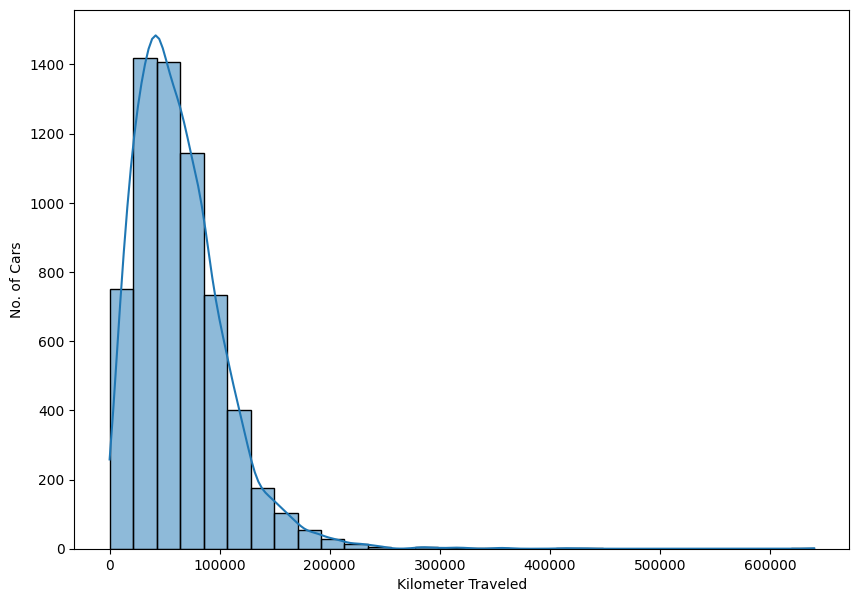

In [71]:
# distribution of kilometer a car has traveled

plt.figure(figsize=(10,7))
sns.histplot(data = df,x='kms_run', kde=True,bins=30)
plt.xlabel("Kilometer Traveled")
plt.ylabel("No. of Cars")
plt.show()

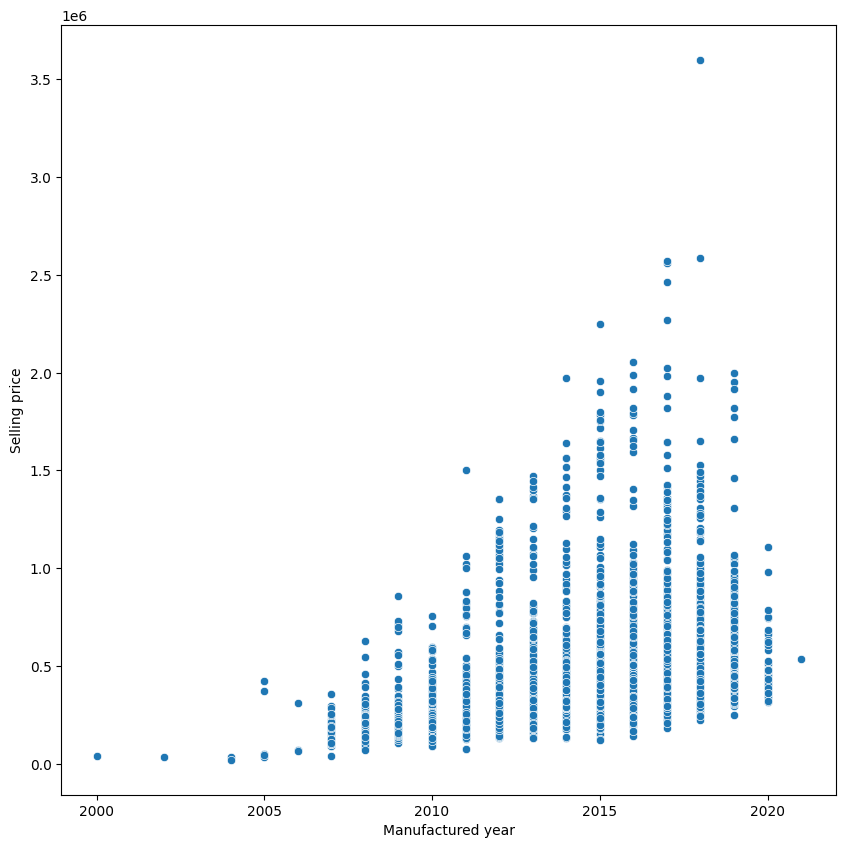

In [72]:
# showing the relation between the car price and the year

plt.figure(figsize=(10,10))
sns.scatterplot(data = df,x='yr_mfr',y='sale_price')
plt.xlabel("Manufactured year")
plt.ylabel("Selling price")
plt.show()

In [73]:
# correlation between selling price vs original price

df[['sale_price','original_price']].corr()

,sale_price,original_price
sale_price,1.000000,0.930506
original_price,0.930506,1.000000


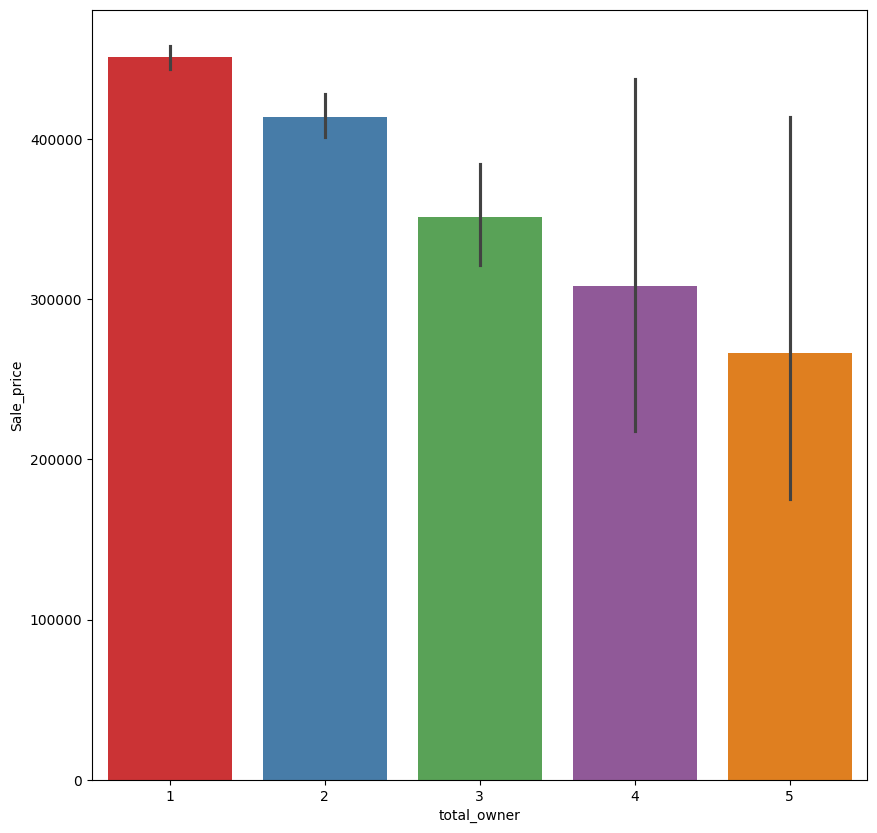

In [ ]:
# Checking how the number of owner for a car can affect the selling price


plt.figure(figsize=(10,10))
sns.barplot(data = df,x='total_owners',y='sale_price',palette='Set1')
plt.xlabel("total_owner")
plt.ylabel("Sale_price")
plt.show()

In [78]:
df[df_numeric].corr()

,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
yr_mfr,1.000000,-0.362162,0.496643,0.006486,0.058632,0.085877,-0.255276,0.516087,0.431972,0.496642,0.496643,0.076636,0.027679
kms_run,-0.362162,1.000000,-0.053544,-0.101687,0.018058,-0.062577,0.096796,-0.068210,0.019216,-0.053545,-0.053544,-0.062372,0.010114
sale_price,0.496643,-0.053544,1.000000,0.071490,-0.002325,0.009708,-0.097533,0.971958,0.930506,1.000000,1.000000,0.040036,0.005370
times_viewed,0.006486,-0.101687,0.071490,1.000000,0.027186,0.094722,0.027799,0.093079,0.082133,0.071490,0.071490,0.195923,-0.002848
assured_buy,0.058632,0.018058,-0.002325,0.027186,1.000000,0.228736,-0.048973,0.019437,0.007576,-0.002326,-0.002325,0.032091,-0.001674
is_hot,0.085877,-0.062577,0.009708,0.094722,0.228736,1.000000,-0.056909,0.098607,-0.028569,0.009707,0.009709,0.081862,-0.313886
total_owners,-0.255276,0.096796,-0.097533,0.027799,-0.048973,-0.056909,1.000000,-0.104855,-0.066472,-0.097532,-0.097533,-0.041028,0.009431
broker_quote,0.516087,-0.068210,0.971958,0.093079,0.019437,0.098607,-0.104855,1.000000,0.927995,0.971958,0.971958,0.061336,-0.015720
original_price,0.431972,0.019216,0.930506,0.082133,0.007576,-0.028569,-0.066472,0.927995,1.000000,0.930506,0.930506,0.069782,0.030789
emi_starts_from,0.496642,-0.053545,1.000000,0.071490,-0.002326,0.009707,-0.097532,0.971958,0.930506,1.000000,1.000000,0.040037,0.005370


Categorical Feature Analysis

In [79]:
df_categorical = [column for column in df.columns if df[column].dtype == 'object']
df_categorical

['car_name',
 'fuel_type',
 'city',
 'body_type',
 'transmission',
 'variant',
 'registered_city',
 'registered_state',
 'rto',
 'source',
 'make',
 'model',
 'car_availability',
 'car_rating',
 'ad_created_on',
 'fitness_certificate']

In [87]:
# Checking which fuel type car has highest sale price

print(df.groupby('fuel_type')['sale_price'].mean().round(2))

fuel_type
diesel          596785.60
petrol          377201.44
petrol & cng    320830.53
petrol & lpg    231485.51
Name: sale_price, dtype: float64


In [88]:
# Checking which body type  has highest sale price

print(df.groupby('body_type')['sale_price'].mean().round(2))

body_type
hatchback        346291.95
luxury sedan     969865.72
luxury suv      1054044.85
sedan            442563.12
suv              670140.07
Name: sale_price, dtype: float64


In [93]:
# Checking which car is mostly selling

df['car_name'].value_counts()

car_name
maruti swift              495
hyundai i10               363
maruti swift dzire        343
maruti wagon r 1.0        319
hyundai i20               246
                         ... 
mercedes benz ml class      1
tata aria                   1
bmw x3                      1
mercedes benz a class       1
mercedes benz b class       1
Name: count, Length: 129, dtype: int64

In [95]:
# Checking if registered state affects the selling price

df.groupby('registered_state')['sale_price'].mean().round(2)

registered_state
andhra pradesh    455857.62
delhi             387632.67
gujarat           457161.32
haryana           451830.63
jharkhand          90000.00
karnataka         454591.66
maharashtra       439973.26
punjab            150000.00
tamil nadu        466811.26
telangana         435231.77
uttar pradesh     460739.48
uttarakhand       215000.00
west bengal       312292.14
Name: sale_price, dtype: float64

In [98]:
df.columns

Index(['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city',
       'times_viewed', 'body_type', 'transmission', 'variant', 'assured_buy',
       'registered_city', 'registered_state', 'is_hot', 'rto', 'source',
       'make', 'model', 'car_availability', 'total_owners', 'broker_quote',
       'original_price', 'car_rating', 'ad_created_on', 'fitness_certificate',
       'emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail'],
      dtype='object')

In [101]:
# Checking if higher car rating, warranty, assured_buy, reserved cars, EMI, booking_down_payment

X = ['car_rating','warranty_avail','assured_buy','reserved','emi_starts_from','booking_down_pymnt']

for column in X:
    print(f"\n\n\n {column} \n {df.groupby(column)['sale_price'].mean().round(2)}")




 car_rating 
 car_rating
fair          291460.92
good          274065.17
great         461380.36
overpriced    302071.43
Name: sale_price, dtype: float64



 warranty_avail 
 warranty_avail
False    438035.25
True     447840.35
Name: sale_price, dtype: float64



 assured_buy 
 assured_buy
False    439662.29
True     437986.37
Name: sale_price, dtype: float64



 reserved 
 reserved
False    432891.96
True     457404.17
Name: sale_price, dtype: float64



 emi_starts_from 
 emi_starts_from
465        20000.0
767        33000.0
813        35000.0
821        35340.0
859        37000.0
           ...    
57193    2462277.0
59426    2558429.0
59731    2571559.0
60064    2585899.0
83619    3600000.0
Name: sale_price, Length: 3959, dtype: float64



 booking_down_pymnt 
 booking_down_pymnt
3000        20000.0
4950        33000.0
5250        35000.0
5301        35340.0
5550        37000.0
            ...    
369342    2462277.0
383765    2558429.0
385734    2571559.0
387885    2585899.0
54

All this shows that it affects the salling price

In [102]:
# Checking if there is outlier present in data or not 

In [105]:
# if there is any car that has travelled more with high selling price or vice-versa

high_kms = df['kms_run'].quantile(0.90)
high_price = df['sale_price'].quantile(0.90)

high_kms, high_price


(np.float64(114188.0), np.float64(717599.0))

In [106]:
df_outliers = df[
    (df['kms_run'] >= high_kms) & (df['sale_price'] >= high_price)
]

df_outliers

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
141,toyota corolla altis,2014,petrol,134937,751399,noida,1166,luxury sedan,manual,gl,...,1,733302,910742.0,great,2021-03-19T13:08:48.333,True,17453,112710,False,False
144,toyota fortuner,2013,diesel,154297,1213917,noida,2095,luxury suv,automatic,3.0 at 4x2,...,1,1250172,1510690.0,great,2021-02-18T11:59:03.375,True,28196,182088,False,False
204,toyota fortuner,2012,diesel,169704,1089687,noida,2557,luxury suv,manual,3.0 mt 4x2,...,1,1122405,1359937.0,great,2021-03-12T06:44:32.569,True,25311,163454,True,False
389,toyota fortuner,2012,diesel,166542,1102413,gurgaon,1600,luxury suv,manual,3.0 mt 4x2,...,1,1060500,1249075.0,great,2020-11-26T01:30:01.283,True,25606,165362,False,False
390,toyota fortuner,2012,diesel,194439,1158367,gurgaon,1443,luxury suv,manual,3.0 mt 4x4,...,1,1131584,1346736.0,great,2021-04-19T09:46:30.646,True,26906,173756,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,maruti vitara brezza,2017,diesel,150584,731399,ahmedabad,664,suv,manual,zdi plus,...,1,756500,909885.0,great,2021-04-09T12:00:09.432,True,16989,109710,False,False
5654,maruti ertiga,2018,petrol & cng,150635,740799,ahmedabad,1709,suv,manual,vxi cng,...,1,736253,886187.0,great,2021-03-23T12:22:21.594,True,17207,111120,False,False
5828,toyota fortuner,2013,diesel,205697,1105948,noida,1695,luxury suv,manual,3.0 mt 4x2,...,1,1108509,1115009.0,great,2021-03-06T11:57:47.624,True,25688,165893,False,False
6119,mahindra xuv500,2015,diesel,119932,733899,mumbai,1235,luxury suv,manual,w8 fwd,...,2,760198,853387.0,great,2020-12-20T09:00:01.263,True,17047,110085,True,False


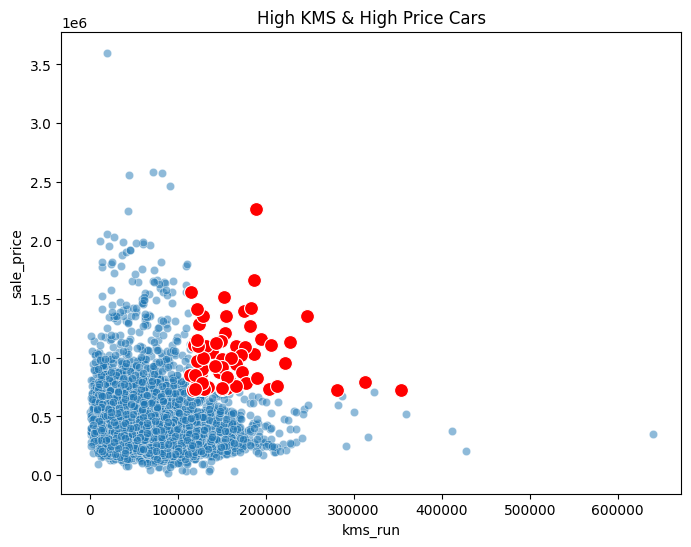

In [108]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='kms_run', y='sale_price', alpha=0.5)

sns.scatterplot(
    data=df_outliers,
    x='kms_run',
    y='sale_price',
    color='red',
    s=100
)

plt.title("High KMS & High Price Cars")
plt.show()

In [109]:
df_outliers[['car_name','kms_run','sale_price']]

,car_name,kms_run,sale_price
141,toyota corolla altis,134937,751399
144,toyota fortuner,154297,1213917
204,toyota fortuner,169704,1089687
389,toyota fortuner,166542,1102413
390,toyota fortuner,194439,1158367
...,...,...,...
5652,maruti vitara brezza,150584,731399
5654,maruti ertiga,150635,740799
5828,toyota fortuner,205697,1105948
6119,mahindra xuv500,119932,733899


**INSIGHTS**

All these affects the resell price of the car

- Fuel type, Body type, Registered State, Registered city, warrenty, kilometer traveled, Year of Manufacture, EMI